# Introduction to Image Analysis Basics in Python with Scikit Image
Now that we have a grasp of the basics of python it's time to get started with some proper image analysis! For the purposes of trying out image analysis I have a picture of a tribolium embryo with stained nuclei. It previously was a 3D image but we are working with a maximum projection to keep it simple (This means the maximum intensity over all slices of the embryo were taken). Now to see how processing is done in python the explanation will be shown with this example.
The first step in any program is to import the libraries needed. You can import whole libraries for example numpy:

In [1]:
# we are importing it as 'np' to make the code that we have to write shorter
import numpy as np

Or we can import parts of a library that we need for example from scikit image or matplotlib

In [2]:
from skimage import data, io, filters, feature
import matplotlib.pyplot as plt

If you have downloaded anaconda and created an environment as was described in my first [post](https://cryaaa.github.io/Python-Image-Analysis-Blog/Introduction_to_Python) you will have these libraries pre-installed as they are some of the standard scientific packages needed in python. If you get any errors, go to the command line, activate your environment and install the libraries. If you search the library you want to install in google you will find how to install them in your environment on the sites. 

Now that we have the libraries imported we can talk a bit about them: Numpy is one of the most important libraries you'll need since a lot of the other libraries we will work with are partially based on numpy. In short numpy is a framework with which arrays can be used for mathmatical operations like vectors and matrices, but it is also far more than that. I would HIGHLY suggest watching [this video](https://www.youtube.com/watch?v=4uFs1qouPEI&list=PLZsOBAyNTZwYHBIlu_PUO19M7aHMgwBJr&index=12&ab_channel=DigitalSreeni) on numpy arrays and how they work. It is also helpful to play around with numpy arrays yourself to get used to how they work, because pictures in python are nothing else that numpy arrays of intensities!

The other library we will be using is scikit image: you could think of this library a bit like the ImageJ of python. It has hundreds of functions needed for image analysis included and this saves us form defining our own functions for gaussian blurs, thresholding, etc. Most importantly the 'io' submodule can be used to read and write images into or from python:

In [3]:
# you will need to write the filepath for where you have
# the data stored in this variable as a string!
yourfilepath = 'data//02 Introduction to Image Analysis Basics in Python with Scikit Image//'

# the image will now be loaded into this variable
tribolium = io.imread(yourfilepath + 'MAX_Lund_18.0_22.0_Hours Z-projection t1.tif')

# Let's see what happens if we print it!
print(tribolium)
print('shape of tribolium picture: {}'.format(tribolium.shape))

[[147 147 147 ... 145 148 149]
 [146 149 148 ... 142 149 153]
 [149 147 149 ... 145 152 148]
 ...
 [130 135 133 ... 164 148 146]
 [129 130 130 ... 143 151 148]
 [130 131 140 ... 145 150 144]]
shape of tribolium picture: (1024, 512)


Now we can obviously see that printing the values of the picture do not show it. We can also see that the shape of the picture is 1024 x 512 pixels and is represented by and array of 1024 arrays with the length 512: each value representing the intensity of a pixel. To take a look at a 2D image we need to use other functions. Either we can use scikit image or matplotlib: a library for plotting data (and images). Below you can see how to do this:

C:\Users\ryans\miniconda3\envs\masterthesis_oldpy_v2\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


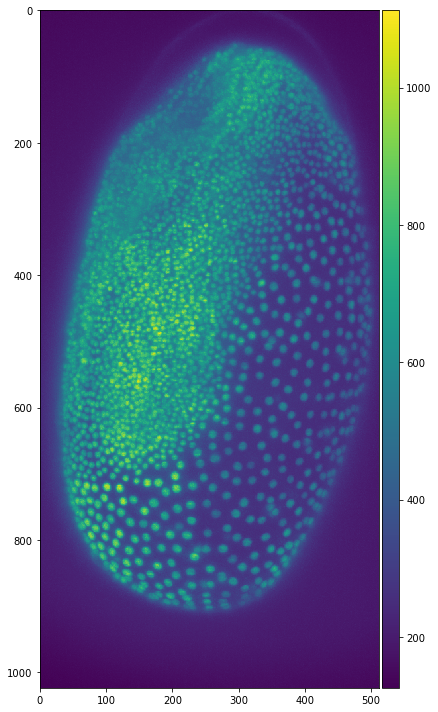

In [4]:
# This line of code changes the image size when displayed
# the command is from matplotlibs pyplot submodule
plt.figure(figsize=(10,10))

# This line of code visualises the picture with the 
# configured size
io.imshow(tribolium)

We can also display images with matplotlib. This needs more lines of code but we also have some more options regarding the plots like title. A detailed description of different plotting techniques can be found [here](https://matplotlib.org/3.1.0/gallery/subplots_axes_and_figures/subplots_demo.html)

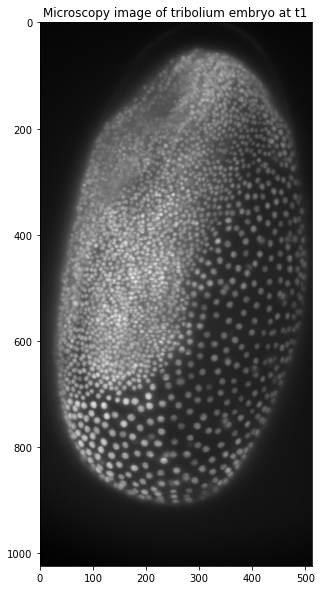

In [5]:
# here two objects of the plot are generated
# again we are setting the figure size larger
# than the standard size
fig, ax = plt.subplots(figsize=(10,10))

# the ax object is then used to display our picture
# cmap changes the colormap to greyscale
ax.imshow(tribolium, cmap='gray')

# we can also set a title for the plot in matplotlib
ax.set_title('Microscopy image of tribolium embryo at t1')

# The final command shows the plot we have generated above
plt.show()

Now that we have learnt how to look at our image we can move on to manipulating it! First we will perform simple thresholding with a median filter as preprocessing and otsu as the tresholding method. As you will see thresholding works slightly different to ImageJ and cellprofiler as we only get the value of the threshold. This value can then be used to check each pixel. Since our image is a numpy array this is really easy and only one line of code! To look at the original image side by side we will use matplotlib to display the results:

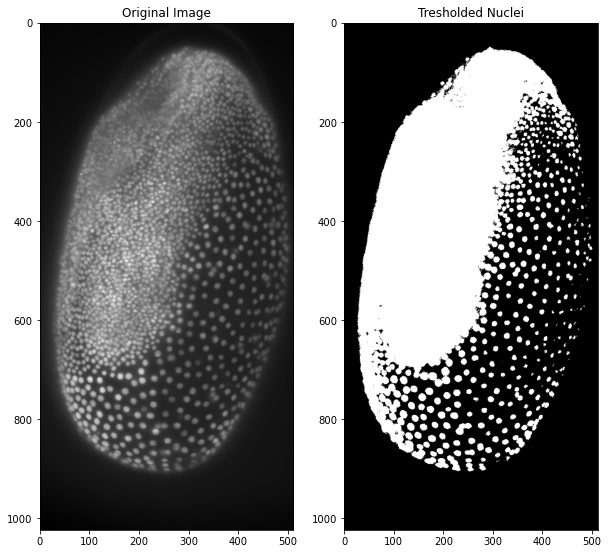

In [6]:
# importing the scipy library since it contains a median filter
from scipy import ndimage

# medianfiltering with scipy to remove noise in the image
medianfilteredtrib = ndimage.median_filter(tribolium, size = 1)

# determining the intensity value of the threshold according to otsu
otsu_thresh = filters.threshold_otsu(medianfilteredtrib)

# here we perform the binarisation and all it takes is one line!
# the larger than symbol applies to each pixel in the image and returns
# either true or false, which is either white ore black, respectively
tribolium_binary = medianfilteredtrib > otsu_thresh


# plotting the original and thresholded image
# the 1 after the subplot determines number of rows
# the 2 after the subplot determines number of columns
fig, (ax1, ax2) = plt.subplots(1, 2, figsize =(10,10))

# show the results in grayscale
plt.gray()  

# displaying the two images
ax1.imshow(tribolium)
ax2.imshow(tribolium_binary)

# setting titles
ax1.set_title("Original Image")
ax2.set_title("Tresholded Nuclei")

# showing the plots
plt.show()

Instead of writing every line of code directly we can also perform more complicated workflows by defining a function and then calling it. This is especially helpful when we need to use functions often or we want to keep the code simple to not get lost in what sometimes is called [spaghetti-code](https://en.wikipedia.org/wiki/Spaghetti_code). Here we are writing a function that does the median-filter and thresholding like above, with a few input parameters so we can choose the median-filter size and if the background is black or white. If we already write default values in the function definition we can choose to change these values when we call the function or just call the function without the variables and work with the default values. The result should still be the same as above:

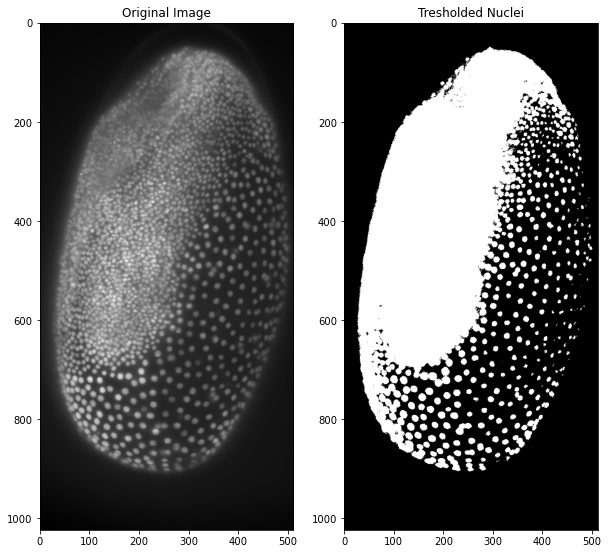

In [7]:
def median_and_otsutresh(img,mediansize = 1,blackbgnd = True):
    # for a function to always work you need to import the libraries used in the function
    from scipy.ndimage import median_filter
    from skimage.filters import threshold_otsu              
    
    medianimg = median_filter(img,mediansize)
    
    tresh = threshold_otsu(medianimg)
    
    # check if the background is black
    if blackbgnd:
        # return thresholded image
        return medianimg > tresh
    
    # background is white
    else:
        # return thresholded image
        return medianimg < tresh

# calling the function
tribolium_binary_function = median_and_otsutresh(tribolium)    

# plotting------------------------------------------------------
fig, (ax1, ax2) = plt.subplots(1, 2, figsize =(10,10))
plt.gray()  

# displaying the two images
ax1.imshow(tribolium)
ax2.imshow(tribolium_binary_function)

# setting titles
ax1.set_title("Original Image")
ax2.set_title("Tresholded Nuclei")

# showing the plots
plt.show()    

These results are not too great so some preprocessing appart from the median filter is needed. Here we will use a tophat filter for background subtraction in order to achieve a more percise segmentation. The function shown here is a simple implementation of the scikit image function and works with a radius as parameter for the tophat filtering. A more in-depth look at background subtration is will be provided in a separate blogpost!

Text(0.5, 1.0, 'Thresholded Image')

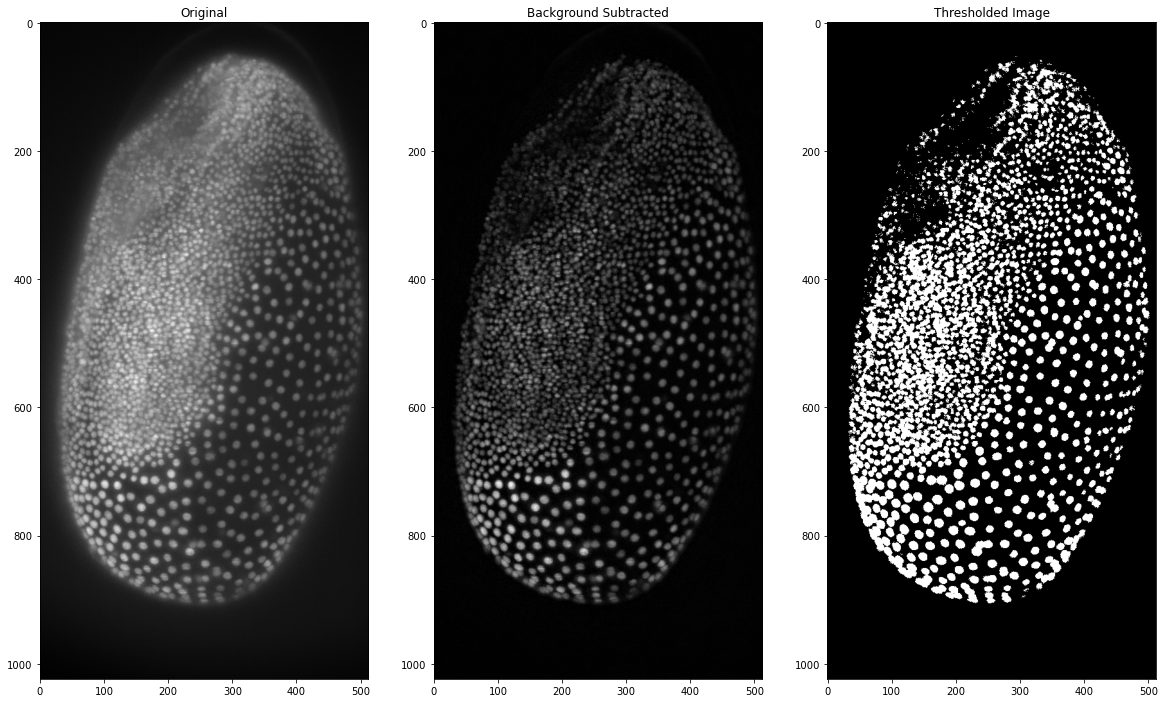

In [8]:
# defining a function for background subtraction
def subtract_background(image, radius=50, light_bg=False):
        #scikit image tophat function and structuring element need to be imported
        from skimage.morphology import white_tophat, black_tophat, disk 
        
        # this structuring element determines the size of background subtraction
        str_el = disk(radius)
        
        if light_bg:
            # the tophat function needs the image as well as the structuring element
            return black_tophat(image, str_el)
        
        else:
            return white_tophat(image, str_el)

# calling the function        
b_sub_triboium = subtract_background(tribolium,15)        

# thresholding with previous function
thresh_b_sub_trib = median_and_otsutresh(b_sub_triboium)

# plotting-------------------------------------------------------------
# This time we want three plots so we need to change the axes and values accordingly!
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize =(20,20))

ax1.imshow(tribolium)
ax1.set_title('Original')

ax2.imshow(b_sub_triboium) 
ax2.set_title('Background Subtracted')

ax3.imshow(thresh_b_sub_trib)
ax3.set_title('Thresholded Image')

To actually get to individual marked cells we need to perform connected components analysis, in which each seperate group of white pixels is marked as an individual entity. This is done by assigning a different grey value to each pixel and is easily handled with the measure submodule of scikit image. The result can then be plotted 

Text(0.5, 1.0, 'Connected Componets Analysis')

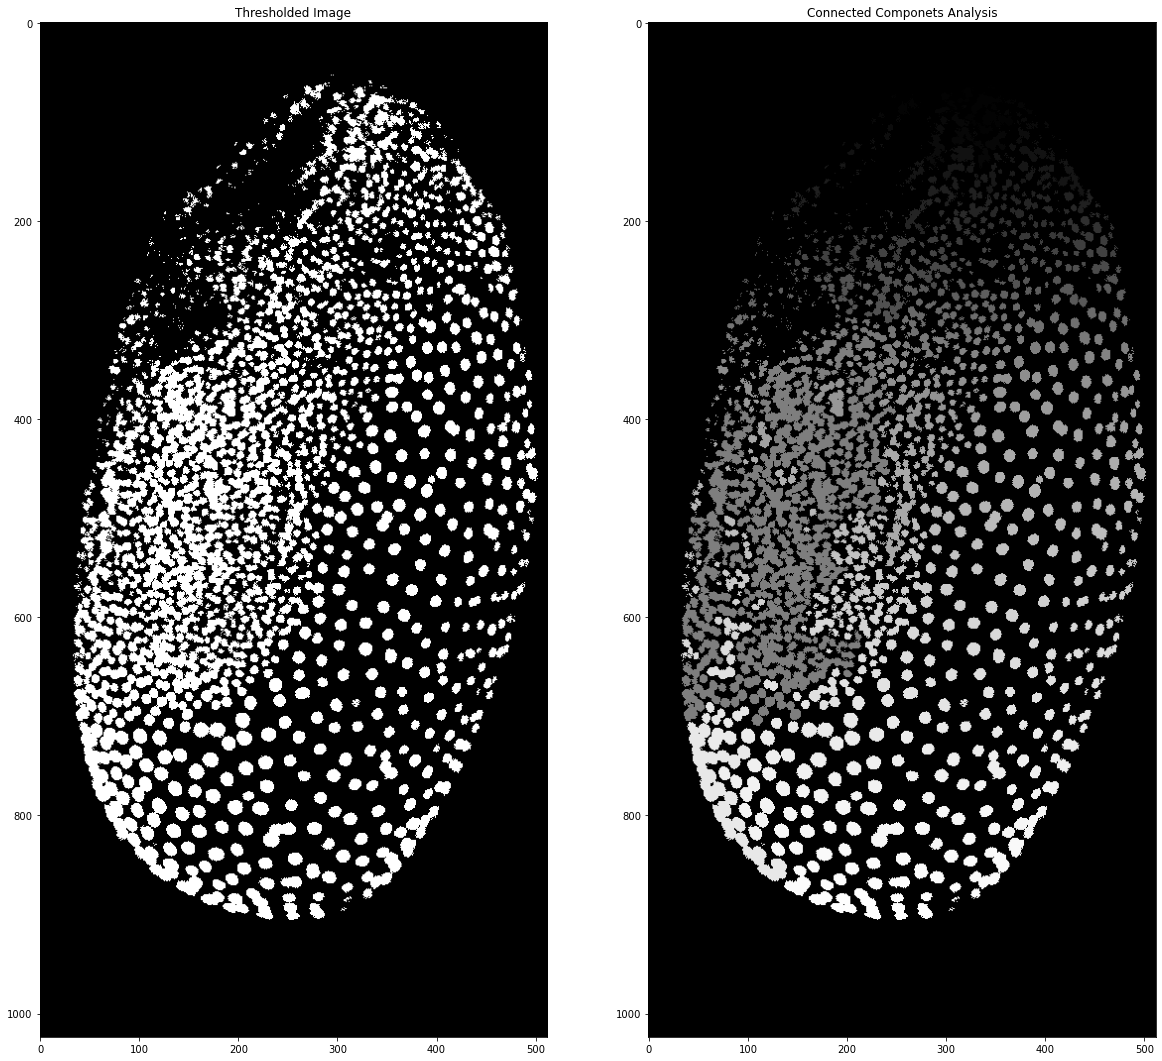

In [10]:
from skimage import segmentation, measure # importing the libraries

# performing the binarisation in just one line of code!
binarised_tribolium = median_and_otsutresh(subtract_background(tribolium,15),1) # saving the binarised image as variable

# calling the labelling function from scikit image
labelled_tribolium = measure.label(binarised_tribolium)



fig, (ax1, ax2) = plt.subplots(1, 2, figsize =(20,20)) 
ax1.imshow(binarised_tribolium)
ax1.set_title('Thresholded Image')
ax2.imshow(labelled_tribolium)               
ax2.set_title('Connected Componets Analysis')

As you can see after connected components analysis the different segmented nuclei have differing grey values but sometimes it's hard to see the nuclei or to differentiate them from eachother. To get random colors for each cell we need to generate our own colourmap and to do this we will use numpy! A colourmap is nothing than a 2 dimensional array of shape 256 x 3. The 3 is because each colour is made up of a red, green and blue value. If we want to have a black background we need the first element of the colourmap to be black: 0 red, 0 green and 0 blue. After that we can have random values for each next element. Since randomness in computing is never quite real we can also set a seed for the randomness. This means if we run this code with the same seed on another computer we will get the very same 'randomness'. For some more information on random numbers in the computers you can read about it [here](https://www.sharpsightlabs.com/blog/numpy-random-seed/).

Text(0.5, 1.0, 'Connected Componets Analysis')

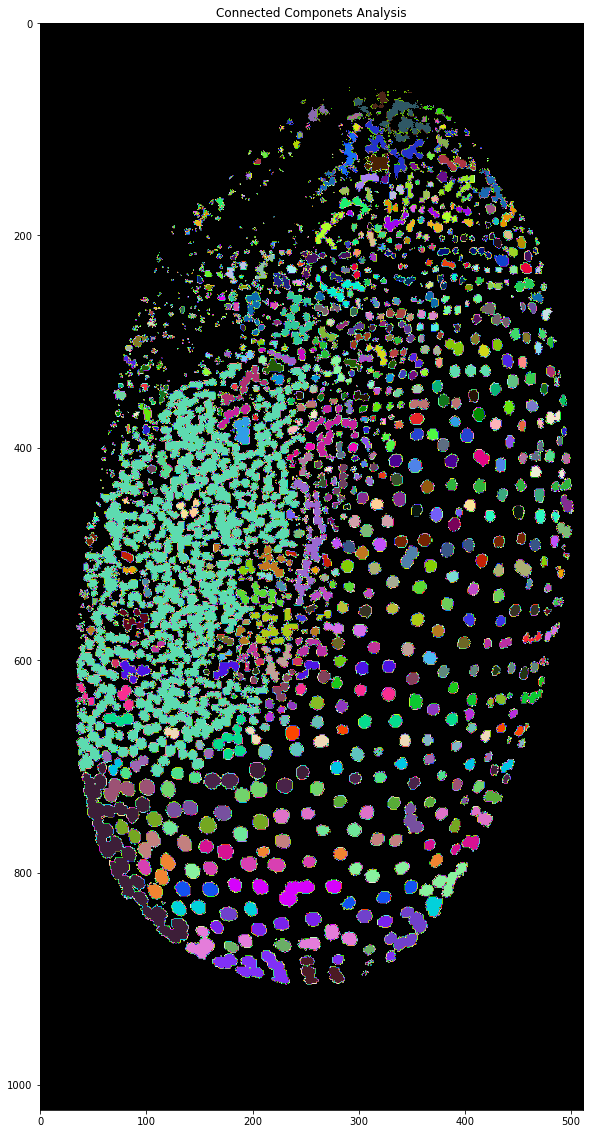

In [12]:
# here we are setting the seed for randomness
np.random.seed(1)

# this is the first colour we generate: black for the background
# we are doing this in numpy as numpy has random functions
colours = np.zeros((1,3), dtype=float)

# to the black colour we now add the rest which are filled
# with random values
randcmap = np.append(colours,(np.random.rand(255,3)),axis=0)

# now we can plot the result of the connected components analysis
# with the new colourmap
import matplotlib

fig, ax1 = plt.subplots(1, 1, figsize =(20,20))

# when displaying the image we can now choose our custom colormap
ax1.imshow(labelled_tribolium, cmap = matplotlib.colors.ListedColormap(randcmap))
ax1.set_title('Connected Componets Analysis')

Even though the borders of the nuclei are slightly bugggy and show what seem to be rainbows the cells can be differentiated from eachother much more easily and we finally have a good result for the workflow. Next time we will get into another method for achieving segmentations without relying on thresholding!